# LGF (Lemon Graph Format) Examples

This notebook demonstrates how to use IronWeaver's LGF parser to load and work with graph data from text files.

In [1]:
# Import required modules
from ironweaver import parse_lgf, parse_lgf_file
import networkx as nx
import matplotlib.pyplot as plt

## Example 1: Parse LGF from String

In [2]:
# Simple LGF example
lgf_content = """
alice Person
  name = "Alice Johnson"
  age = 30
  -knows-> bob
    since = "2020-01-15"
    strength = 0.8

bob Person
  name = "Bob Smith"
  age = 28
"""

# Parse the LGF content
graph = parse_lgf(lgf_content)
print(f"Parsed {graph.node_count()} nodes")
print(f"Node IDs: {list(graph.keys())}")

Parsed 2 nodes
Node IDs: ['bob', 'alice']


## Example 2: Explore Node Attributes and Relationships

In [3]:
# Get Alice's node and examine attributes
alice = graph.get_node("alice")
print(f"Alice's attributes: {dict(alice.attr)}")

# Examine Alice's relationships
print(f"\nAlice's relationships:")
for edge in alice.edges:
    print(f"  Alice -{edge.attr['type']}-> {edge.to_node.id}")
    print(f"    Edge attributes: {dict(edge.attr)}")

Alice's attributes: {'labels': ['Person'], 'age': 30, 'name': 'Alice Johnson'}

Alice's relationships:
  Alice -knows-> bob
    Edge attributes: {'type': 'knows', 'strength': 0.8, 'since': '2020-01-15'}


## Example 3: Load from File and Visualize

Social network: 4 nodes


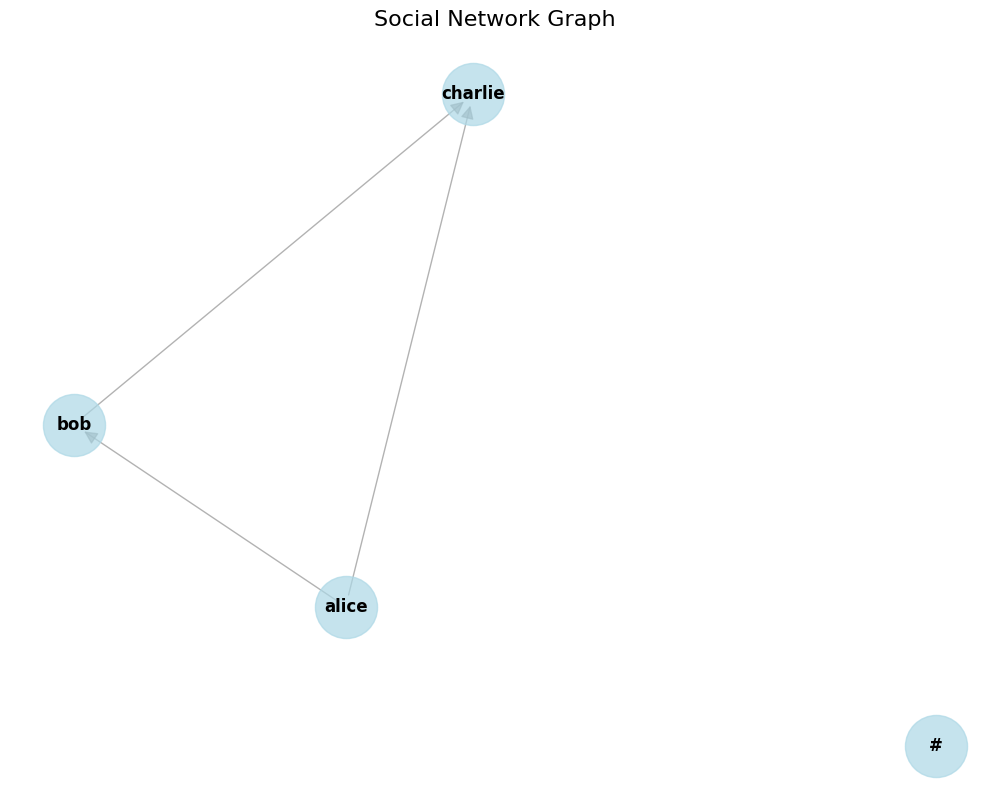

In [4]:
# Load social network example
social_graph = parse_lgf_file("lgf/social_network.lgf")
print(f"Social network: {social_graph.node_count()} nodes")

# Convert to NetworkX for visualization
nx_graph = social_graph.to_networkx()

# Create visualization
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(nx_graph, k=2, iterations=50)

# Draw nodes
nx.draw_networkx_nodes(nx_graph, pos, node_color='lightblue', 
                       node_size=2000, alpha=0.7)

# Draw edges
nx.draw_networkx_edges(nx_graph, pos, edge_color='gray', 
                       arrows=True, arrowsize=20, alpha=0.6)

# Draw labels
nx.draw_networkx_labels(nx_graph, pos, font_size=12, font_weight='bold')

plt.title("Social Network Graph", size=16)
plt.axis('off')
plt.tight_layout()
plt.show()

## Example 4: Organization Hierarchy

In [5]:
# Load organizational structure
org_graph = parse_lgf_file("lgf/organization.lgf")
print(f"Organization: {org_graph.node_count()} nodes")

# Find all managers
managers = []
for node_id in org_graph.keys():
    node = org_graph.get_node(node_id)
    if node.attr.get('is_manager') == True:
        managers.append(node_id)

print(f"\nManagers: {managers}")

# Show reporting structure
print("\nReporting structure:")
for node_id in org_graph.keys():
    node = org_graph.get_node(node_id)
    for edge in node.edges:
        if edge.attr.get('type') == 'manages':
            print(f"  {node_id} manages {edge.to_node.id}")

Organization: 6 nodes

Managers: ['alice', 'diana']

Reporting structure:
  alice manages bob
  alice manages charlie


## Example 5: Import Feature

In [6]:
# Load file that imports other files
combined_graph = parse_lgf_file("lgf/relationships.lgf")
print(f"Combined graph: {combined_graph.node_count()} nodes")

# Show that people from people.lgf are available
for node_id in combined_graph.keys():
    node = combined_graph.get_node(node_id)
    print(f"{node_id}: {node.attr.get('name')} (age: {node.attr.get('age')})")
    
# Show relationships
print("\nRelationships:")
for node_id in combined_graph.keys():
    node = combined_graph.get_node(node_id)
    for edge in node.edges:
        print(f"  {node_id} -{edge.attr['type']}-> {edge.to_node.id}")

Combined graph: 4 nodes
alice: Alice Johnson (age: 30)
bob: Bob Smith (age: 28)
charlie: Charlie Brown (age: 26)
#: None (age: None)

Relationships:
  alice -knows-> bob
  alice -knows-> charlie
  bob -knows-> charlie


## Example 6: Graph Algorithms on LGF Data

In [7]:
# Use IronWeaver algorithms on LGF-loaded graph
social_graph = parse_lgf_file("lgf/social_network.lgf")

# Find shortest path
try:
    path = social_graph.shortest_path_bfs("alice", "charlie")
    print(f"Shortest path from Alice to Charlie: {list(path.keys())}")
except:
    print("No path found from Alice to Charlie")

# Explore neighborhood around Alice
alice_neighborhood = social_graph.filter(ids=["alice"]).expand(social_graph, depth=1)
print(f"\nAlice's neighborhood (1 hop): {list(alice_neighborhood.keys())}")

# Get Alice's direct connections
alice_node = social_graph.get_node("alice")
connections = [edge.to_node.id for edge in alice_node.edges]
print(f"Alice's direct connections: {connections}")

Shortest path from Alice to Charlie: ['alice', 'charlie']

Alice's neighborhood (1 hop): ['charlie', 'alice', 'bob']
Alice's direct connections: ['bob', 'charlie']
